# Quantium Virtual Internship
## Notebook 2

## The task
We need to analyse the data to understand current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  

### Datasets:  
QVI_purchase_behaviour.csv  
QVI_transaction_data.xlsx

# Explore sales

Our insights need to have a commercial application as our end goal is to form a strategy based on the findings to provide a clear recommendation to the Category Manager. 

## Data analysis and customer segments 
Define metrics:  
- total sales  
- drivers of sales  
- where the highest sales are coming from

Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of the report.

Deep dive into customer segments – define your recommendation from your insights, 
- determine which segments should be targeted  
- are packet sizes relative?  
- form an overall conclusion  

In [19]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('magma')
import plotly.express as px
import plotly.graph_objects as go

In [101]:
df = pd.read_csv('data/clean_quantium_transaction_data.csv')
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,weight,weight_bin,brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,160-175g,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,160-175g,CCs


In [102]:
df.shape

(249668, 11)

## Most popular brands

Most popular brands overall are Kettle, Smiths, Doritos and Pringles in total appearing in 50% of transactions.

In [109]:
brand_counts = pd.DataFrame(df['brand'].value_counts(normalize=True)*100)
brand_counts = brand_counts.round(1)

In [110]:
brand_counts = brand_counts.reset_index().rename(columns={'brand':'%', 'index':'Brand'})

In [111]:
# plotly popular brands
data = brand_counts
fig = px.bar(data, 
             x= data['%'], 
             y= data['Brand'],
#              color_continuous_scale='Pastel1',
             color_discrete_sequence=['#c95a8b'],
             title='Most popular brands',
#              labels={'x':'%', 'index':'Brand'},
             template = 'simple_white')

fig.show()

In [112]:
brand_counts.head(4).sum()

Brand    KettleSmithsDoritosPringles
%                               50.1
dtype: object

# Sales from brands

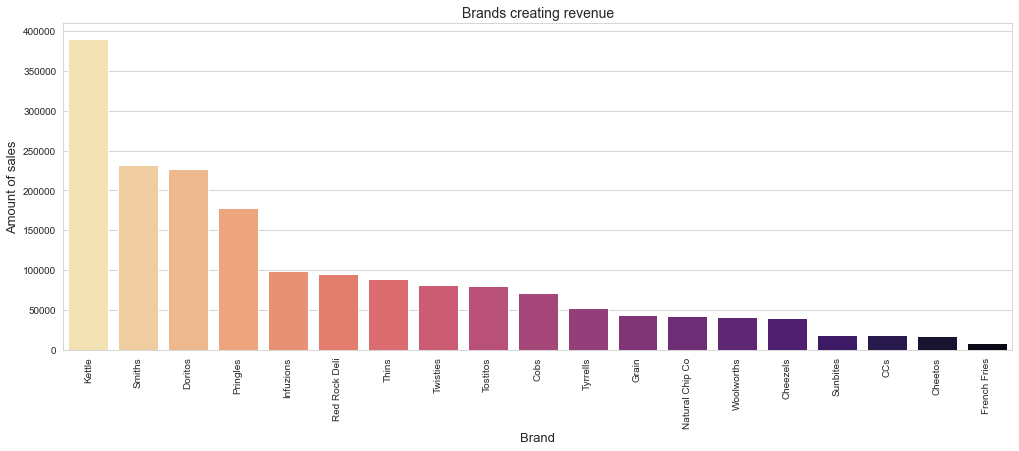

In [113]:
# which brand makes the most money?
plt.figure(figsize=(17,6))

df_items = df[['brand', 'TOT_SALES']]
df_items_sum = df_items.groupby('brand').sum().sort_values(['TOT_SALES'],ascending=False)

x = df_items_sum.index.to_series()
y = df_items_sum['TOT_SALES']

sns.barplot(x=x, y=y, palette='magma_r')
plt.xticks(rotation=90)
plt.xlabel('Brand', fontsize=13)
plt.ylabel('Amount of sales', fontsize=13)
plt.title('Brands creating revenue', fontsize=14);

## Average sale per brand
total sum / qty

In [114]:
num_sold = df[['brand', 'PROD_QTY']]
num_sold_sum = num_sold.groupby('brand').sum().sort_values(['PROD_QTY'],ascending=False)

In [115]:
brand_sold_items = df_items_sum.merge(num_sold_sum, on='brand')

In [116]:
brand_sold_items['avg'] = brand_sold_items['TOT_SALES']/brand_sold_items['PROD_QTY']
brand_avg = brand_sold_items.round(2).sort_values('avg', ascending=False)

<AxesSubplot:xlabel='brand'>

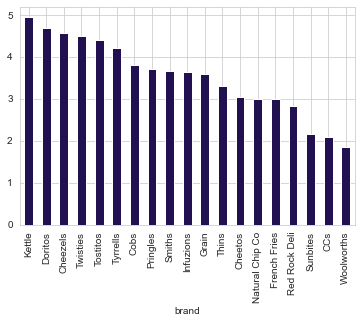

In [117]:
brand_avg['avg'].plot.bar()

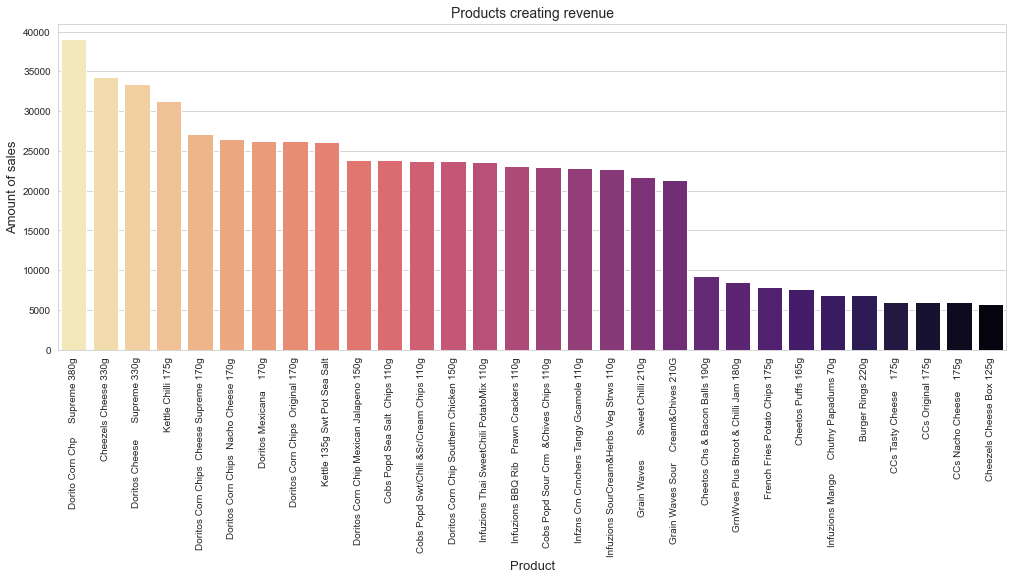

In [118]:
# which product makes the most money?
plt.figure(figsize=(17,6))

df_items = df[['PROD_NAME', 'TOT_SALES']]
df_items_sum = df_items.groupby('PROD_NAME').sum().head(30).sort_values(['TOT_SALES'],ascending=False)

x = df_items_sum.index.to_series()
y = df_items_sum['TOT_SALES']

sns.barplot(x=x, y=y, palette='magma_r')
plt.xticks(rotation=90)
plt.xlabel('Product', fontsize=13)
plt.ylabel('Amount of sales', fontsize=13)
plt.title('Products creating revenue', fontsize=14);

# Customer data

Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is  
How many customers are in each segment  
How many chips are bought per customer by segment  
What's the average chip price by customer segment  

In [119]:
df2 = pd.read_csv('data/QVI_purchase_behaviour.csv')
df2.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [120]:
df2.shape

(72637, 3)

In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [305]:
df2['LYLTY_CARD_NBR'].nunique()

72637

There are 72,637 unique customers.

In [122]:
df2['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [123]:
df2['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

#  
# Combine customer and transaction data

In [124]:
comb = df.merge(df2)

In [125]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249668 entries, 0 to 249667
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   DATE              249668 non-null  object  
 1   STORE_NBR         249668 non-null  int64   
 2   LYLTY_CARD_NBR    249668 non-null  int64   
 3   TXN_ID            249668 non-null  int64   
 4   PROD_NBR          249668 non-null  int64   
 5   PROD_NAME         249668 non-null  object  
 6   PROD_QTY          249668 non-null  int64   
 7   TOT_SALES         249668 non-null  float64 
 8   weight            249668 non-null  int64   
 9   weight_bin        249668 non-null  category
 10  brand             249668 non-null  object  
 11  LIFESTAGE         249668 non-null  object  
 12  PREMIUM_CUSTOMER  249668 non-null  object  
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 25.0+ MB


## How many transactions in different lifestages

In [296]:
# number of customers in each lifestage's premium
ls_prem = comb.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).count()['DATE'].reset_index().rename(columns={'DATE':'count_prem'}).sort_values('count_prem', ascending=False)
ls_prem.head(2)

,LIFESTAGE,PREMIUM_CUSTOMER,count_prem
6,OLDER FAMILIES,Budget,21808
13,RETIREES,Mainstream,20202


In [297]:
# total number of customers in each lifestage
ls_total = ls_prem.groupby('LIFESTAGE').sum().reset_index().rename(columns={'count_prem':'ls_total'})
ls_total.sort_values('ls_total', ascending=False)
ls_prem = ls_prem.merge(ls_total, on='LIFESTAGE')

In [298]:
ls_prem = ls_prem.sort_values('ls_total', ascending=False)
ls_prem.head(2)

,LIFESTAGE,PREMIUM_CUSTOMER,count_prem,ls_total
14,OLDER SINGLES/COUPLES,Premium,16742,51363
13,OLDER SINGLES/COUPLES,Mainstream,17276,51363


In [299]:
# empty dataframe
column_names = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'count_prem', 'ls_total', 'ls_perct']
ls_prem_num = pd.DataFrame(columns = column_names)
# list of lifestages
lifestages = ls_prem['LIFESTAGE'].unique()

In [300]:
# add column ls_perct to show % of each premium group in their lifestage
for i in lifestages:
    df_i = ls_prem[ls_prem['LIFESTAGE']==i]
    df_i['ls_perct'] = (100 * df_i['count_prem'] / df_i['ls_total']).round(0)
    ls_prem_num = ls_prem_num.append(df_i)

/Users/helenahook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [387]:
# plotly number of customers in lifestage and premium
data = ls_prem_num
fig = px.bar(data, 
             x= 'LIFESTAGE', 
             y= 'count_prem', 
             text = 'ls_perct',
             custom_data=['PREMIUM_CUSTOMER', 'ls_total'],
             color_discrete_sequence= px.colors.sequential.Sunsetdark_r,
             title='% of customer premiums in lifestages',
             hover_data=ls_prem.groupby('LIFESTAGE').sum(), 
#              labels={'LIFESTAGE':'Lifestage','PREMIUM_CUSTOMER':'Premium', 'count_prem':'Count', 'ls_total':'Total in lifestage', 'ls_perct':'%'}, 
#              barmode='group', 
             color=data['PREMIUM_CUSTOMER'], 
             template = 'simple_white')

fig.update_traces(hovertemplate="<br>".join(["%{text}% of lifestage", "premium: %{customdata[0]}", "lifestage: %{x}","total customers in lifestage: %{customdata[1]}"]))
fig.update_traces(texttemplate='%{text}%')
fig.show()

Lifestage:  
21% of all transactions are from customers in older singles/couples lifestage.  
19% from retirees.  
18% from older families.  
16% from younger families.  
14% from young singles/couples.   
9% from midage singles/couples.  
and 3% from new families.  
In total that means 58% of all transactions are from older people.  

Premiums in lifestages:  
Prominently budget groups are older families(48% of group), young families(57%) and new families(43%).  
Young singles/couples, retirees and midage singles/couples are largely mainstream.  
Most premium customers can be found in older singles/couples. Though 33% of midage singles/couples are premium as well.  

In [312]:
ls_total['ls_total_p'] = (100 * ls_total['ls_total']/ls_total['ls_total'].sum()).round(0)

In [316]:
ls_total.sort_values('ls_total_p', ascending=False)

,LIFESTAGE,ls_total,ls_total_p
3,OLDER SINGLES/COUPLES,51363,21.0
4,RETIREES,46934,19.0
2,OLDER FAMILIES,45765,18.0
5,YOUNG FAMILIES,41035,16.0
6,YOUNG SINGLES/COUPLES,34309,14.0
0,MIDAGE SINGLES/COUPLES,23700,9.0
1,NEW FAMILIES,6562,3.0


## Sales per lifestage and premium

In [350]:
# sales in each lifestage's premium
ls_prem_sales = comb.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).sum()['TOT_SALES'].reset_index()
ls_prem_sales['sales_perct'] = (100 * ls_prem_sales['TOT_SALES'] / ls_prem_sales['TOT_SALES'].sum()).round(1)
ls_prem_sales.head(2)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,sales_perct
0,MIDAGE SINGLES/COUPLES,Budget,33705.40,1.9
1,MIDAGE SINGLES/COUPLES,Mainstream,85262.75,4.7


In [351]:
# total sales in each lifestage
ls_sales = ls_prem_sales[['LIFESTAGE', 'TOT_SALES']].groupby('LIFESTAGE').sum().reset_index().rename(columns={'TOT_SALES':'ls_sales'})
ls_sales = ls_sales.sort_values('ls_sales', ascending=False).round()
ls_prem_sales = ls_prem_sales.merge(ls_sales, how='left' , on='LIFESTAGE')

In [354]:
ls_prem_sales = ls_prem_sales.sort_values('ls_sales', ascending=True).round()

In [355]:
ls_prem_sales.head(2)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,sales_perct,ls_sales
3,NEW FAMILIES,Budget,20716.0,1.0,47656.0
4,NEW FAMILIES,Mainstream,16078.0,1.0,47656.0


In [357]:
# plotly sales per lifestage and premium
data = ls_prem_sales
fig = px.bar(data, 
             x= 'LIFESTAGE', 
             y= 'sales_perct',
             text = 'sales_perct',
             custom_data=['PREMIUM_CUSTOMER', 'ls_sales'],
#              color_discrete_sequence= px.colors.sequential.Sunsetdark_r,
             color_discrete_map={
                 'Premium':'#7d1d6e' , 
                 'Mainstream':'#ba2678' , 
                 'Budget':'#de3976'},
             title='Sales in customer lifestages and premiums',
             hover_data=ls_prem_sales.groupby('LIFESTAGE').sum(), 
#              labels={'LIFESTAGE':'Lifestage','PREMIUM_CUSTOMER':'Premium', 'TOT_SALES':'Sales amount', 'ls_sales':'Total sales in lifestage', 'sales_perct':'% of sales'}, 
             barmode='group', 
             color=data['PREMIUM_CUSTOMER'], 
             template = 'simple_white')
fig.update_traces(hovertemplate="<br>".join(["%{text}% of total sales", "premium: %{customdata[0]}", "lifestage: %{x}","total sales in lifestage: %{customdata[1]:,}"]))
fig.update_traces(texttemplate='%{text}%')
fig.update_layout(xaxis={'categoryorder':'sum descending'})
# layout(., legend = list(traceorder = "reversed"))
fig.show()

Top sales are coming from budget - older families, mainstream - young singles/couples and mainstream - retirees.  


## How many chips are bought per customer?

### Chips bought per customer in premiums

In [435]:
# total number of chips bought per each customer
customer_q = pd.DataFrame(comb.groupby(['PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR']).sum()['PROD_QTY']).reset_index()
customer_q.head(2)

,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,PROD_QTY
0,Budget,1003,2
1,Budget,1007,2


In [436]:
# average number of chips bought per premium group
customer_q.groupby('PREMIUM_CUSTOMER').mean()['PROD_QTY'].round(1)

PREMIUM_CUSTOMER
Budget        7.0
Mainstream    6.3
Premium       6.7
Name: PROD_QTY, dtype: float64

Budget customers buy most chips on average.  

### Chips bought per customer in lifestages

In [441]:
# total number of chips bought per each customer
customer_ls_q = pd.DataFrame(comb.groupby(['LIFESTAGE', 'LYLTY_CARD_NBR']).sum()['PROD_QTY']).reset_index()
customer_ls_q.head(2)

,LIFESTAGE,LYLTY_CARD_NBR,PROD_QTY
0,MIDAGE SINGLES/COUPLES,1005,1
1,MIDAGE SINGLES/COUPLES,1023,1


In [442]:
# average number of chips bought per lifestage
customer_ls_q.groupby('LIFESTAGE').mean()['PROD_QTY'].round(1).sort_values(ascending=False)

LIFESTAGE
OLDER FAMILIES            9.2
YOUNG FAMILIES            8.8
OLDER SINGLES/COUPLES     6.8
MIDAGE SINGLES/COUPLES    6.3
RETIREES                  6.1
NEW FAMILIES              4.9
YOUNG SINGLES/COUPLES     4.5
Name: PROD_QTY, dtype: float64

Older families buy most chips on average.  Followed right by young families.  

In [446]:
prod_per_c = pd.DataFrame(comb.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR']).sum()['PROD_QTY']).reset_index()
prod_per_c.head(2)

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,1052,1
1,MIDAGE SINGLES/COUPLES,Budget,1081,4


In [448]:
# average number of chips bought by customer in lifestage and premium group
avg_products = prod_per_c.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).mean()['PROD_QTY'].round(1).sort_values(ascending=False).reset_index()
avg_products.head(2)

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,OLDER FAMILIES,Mainstream,9.3
1,OLDER FAMILIES,Budget,9.2


In [449]:
# plotly chips per customer
data = avg_products
fig = px.bar(data, 
             x= 'LIFESTAGE', 
             y= 'PROD_QTY',
             text = 'PROD_QTY',
             custom_data=['PREMIUM_CUSTOMER'],
#              color_discrete_sequence= px.colors.sequential.Sunsetdark_r,
             color_discrete_map={
                 'Premium':'#7d1d6e' , 
                 'Mainstream':'#ba2678' , 
                 'Budget':'#de3976'},
             title='Average units bought per customer',
#              hover_data=ls_prem_sales.groupby('LIFESTAGE').sum(), 
#              labels={'LIFESTAGE':'Lifestage','PREMIUM_CUSTOMER':'Premium', 'TOT_SALES':'Sales amount', 'ls_sales':'Total sales in lifestage', 'sales_perct':'% of sales'}, 
             barmode='group', 
             color=data['PREMIUM_CUSTOMER'], 
             template = 'simple_white')
fig.update_traces(hovertemplate="<br>".join(["%{text} avg chips bought", "premium: %{customdata[0]}", "lifestage: %{x}"]))
fig.update_traces(texttemplate='%{text}%')
fig.update_layout(xaxis={'categoryorder':'sum descending'})
# layout(., legend = list(traceorder = "reversed"))
fig.show()

Older families and young families buy the most units of chips per person.  

## Pack sizes

In [103]:
# pack sizes vary from 70g-380g
# most popular are mid range sizes 160g-175g
print(df['weight'].describe())
print(df['weight_bin'].describe())

count    249668.000000
mean        175.283488
std          59.146755
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: weight, dtype: float64
count       249668
unique           4
top       160-175g
freq        104640
Name: weight_bin, dtype: object


<AxesSubplot:ylabel='Frequency'>

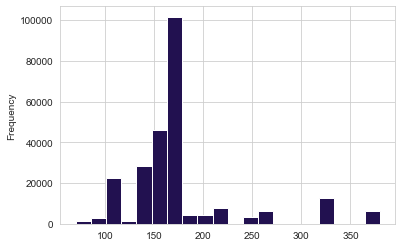

In [104]:
df['weight'].plot.hist(bins=20)

In [105]:
df['weight_bin'].unique()

array(['160-175g', '125-150g', '180-380g', '70-110g'], dtype=object)

In [106]:
# define categorical values order
list_ordering = ['70-110g', '125-150g', '160-175g', '180-380g']  
df['weight_bin'] = pd.Categorical(df['weight_bin'], categories=list_ordering) 

In [107]:
df['weight_bin'].value_counts(normalize=True).sort_index()*100

70-110g     10.775109
125-150g    29.216399
160-175g    41.911659
180-380g    18.096833
Name: weight_bin, dtype: float64

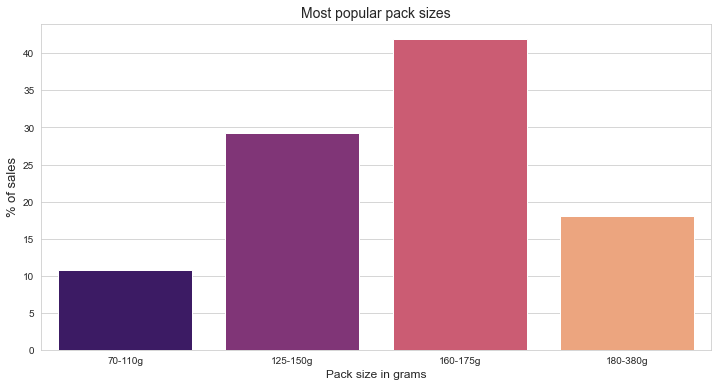

In [108]:
# most popular pack sizes by weight bins
plt.figure(figsize=(12,6))

q = df['weight_bin'].value_counts(normalize=True).sort_index()*100
y = q.values
x = q.index

sns.barplot(x=x, y=y, palette='magma')

plt.xlabel('Pack size in grams', fontsize=12)
plt.ylabel('% of sales', fontsize=13)
plt.title('Most popular pack sizes', fontsize=14);

In [81]:
combo_pm.groupby(['PREMIUM_CUSTOMER', 'weight_bin']).sum()

TOT_SALES
PREMIUM_CUSTOMER weight_bin           
Budget           70-110g      61721.00
                 125-150g    178868.20
                 160-175g    263054.70
                 180-380g    132988.95
Mainstream       70-110g      70553.30
                 125-150g    200511.40
                 160-175g    285392.00
                 180-380g    149795.80
Premium          70-110g      47019.50
                 125-150g    134387.80
                 160-175g    195671.90
                 180-380g     99819.85

<Figure size 864x432 with 0 Axes>

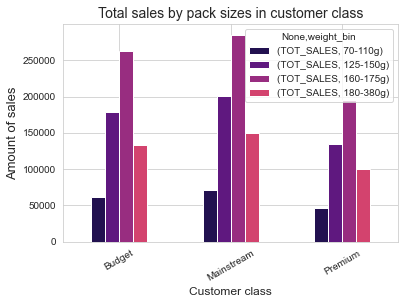

In [79]:
plt.figure(figsize=(12,6))
combo_pm.groupby(['PREMIUM_CUSTOMER', 'weight_bin']).sum().unstack().plot.bar()

plt.xlabel('Customer class', fontsize=12)
plt.xticks(rotation=30)
plt.ylabel('Amount of sales', fontsize=13)
plt.title('Total sales by pack sizes in customer class', fontsize=14);

In [78]:
combo_pm_sum = combo_pm.groupby(['PREMIUM_CUSTOMER', 'weight_bin']).sum().unstack(fill_value=0)
combo_pm_sum

TOT_SALES                               
weight_bin        70-110g   125-150g  160-175g   180-380g
PREMIUM_CUSTOMER                                         
Budget             61721.0  178868.2  263054.7  132988.95
Mainstream         70553.3  200511.4  285392.0  149795.80
Premium            47019.5  134387.8  195671.9   99819.85

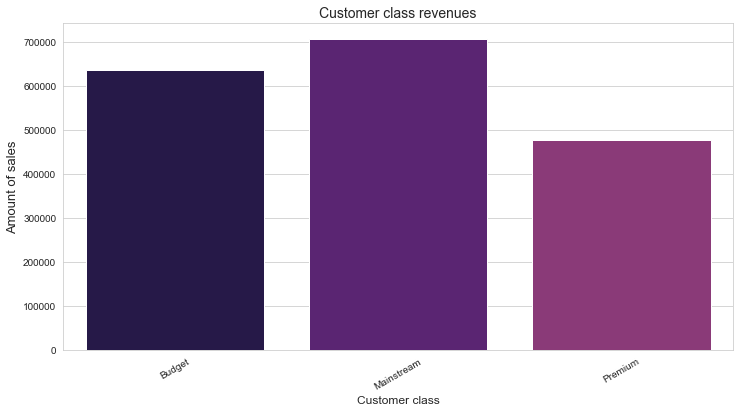

In [77]:
# most popular pack sizes for different customer classes
plt.figure(figsize=(12,6))

combo_pm = comb[['PREMIUM_CUSTOMER', 'TOT_SALES', 'weight_bin']]
combo_pm_sum = combo_pm.groupby('PREMIUM_CUSTOMER').sum()

x = combo_pm_sum.index.to_series()
y = combo_pm_sum['TOT_SALES']

sns.barplot(x=x, y=y) #, palette='magma_r'
# sns.catplot(x=x, y=y, hue=combo_pm['weight_bin'], kind="bar")

plt.xlabel('Customer class', fontsize=12)
plt.xticks(rotation=30)
plt.ylabel('Amount of sales', fontsize=13)
plt.title('Customer class revenues', fontsize=14);